In [1]:
import sys
sys.path.append('/home/wprofile/Documents/Projects/labMNK')
import numpy as np
import pandas as pd
import labmnk as mnk
from matplotlib import pyplot as plt
from IPython.display import display, HTML
from math import sqrt
%matplotlib inline
CSS = """
.output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(CSS))

У нас есть данные двух опытов, 

- 1 набор для определения веса компонентов тензовесов
- 2 набор для определения веса сферы


In [2]:
data1 = pd.read_csv("data1p.csv")
data2 = pd.read_csv("data2p.csv")

In [3]:
display(data1)
display(data2)

,deg,x,y
0,-10,0.417,0.334
1,-5,0.513,0.337
2,0,0.609,0.337
3,5,0.706,0.336
4,10,0.800,0.334
5,15,0.895,0.328
6,20,0.989,0.324
7,25,1.079,0.318
8,30,1.165,0.312


,deg,x,y
0,-10,0.022,1.280
1,-5,0.277,1.296
2,0,0.531,1.302
3,5,0.781,1.299
4,10,1.033,1.288
5,15,1.282,1.268
6,20,1.528,1.238
7,25,1.765,1.200
8,30,1.995,1.153


### Приведем данные к виду $(x-x_0)$, $(y-y_0)$

In [4]:
x_nul = data1['x'][2]
y_nul = data1['y'][2]

data1['x'] = data1['x'].values - x_nul
data1['y'] = data1['y'].values - y_nul
data1.rename(columns={'x' : 'x-x0', 'y' : 'y-y0'}, inplace=True)

data2['x'] = data2['x'].values - x_nul
data2['y'] = data2['y'].values - y_nul
data2.rename(columns={'x' : 'x-x0', 'y' : 'y-y0'}, inplace=True)


In [5]:
display(data1)
display(data2)

,deg,x-x0,y-y0
0,-10,-0.192,-0.003
1,-5,-0.096,0.000
2,0,0.000,0.000
3,5,0.097,-0.001
4,10,0.191,-0.003
5,15,0.286,-0.009
6,20,0.380,-0.013
7,25,0.470,-0.019
8,30,0.556,-0.025


,deg,x-x0,y-y0
0,-10,-0.587,0.943
1,-5,-0.332,0.959
2,0,-0.078,0.965
3,5,0.172,0.962
4,10,0.424,0.951
5,15,0.673,0.931
6,20,0.919,0.901
7,25,1.156,0.863
8,30,1.386,0.816


In [6]:
#data1.drop(data1.columns[[3, 4]], axis=1, inplace=True)

Вычислим sin и 1-cos для того, чтобы построить прямую линию: 
- $X^0 = (G_M + G_x) \times sin(\theta)$
- $Y^0 = G_y - (G_M + G_y) \times cos(\theta)$

Вес, который был определен с помощью тензовесов, будет являться тангенсом угла наклона прямой линии
поэтому мы с помощью метода наименьших квадратов строим кривую $f(x) = a\cdot x + b$, где $a$ измеренный вес в граммах

In [7]:
data1['sin'] = np.sin(data1['deg'].values * np.pi / 180)
data1['1-cos'] = 1 - np.cos(data1['deg'].values * np.pi /180)
data2['sin'] = np.sin(data2['deg'].values * np.pi / 180)
data2['1-cos'] = 1 - np.cos(data2['deg'].values * np.pi /180)
display(data1)
display(data2)

,deg,x-x0,y-y0,sin,1-cos
0,-10,-0.192,-0.003,-0.173648,0.015192
1,-5,-0.096,0.000,-0.087156,0.003805
2,0,0.000,0.000,0.000000,0.000000
3,5,0.097,-0.001,0.087156,0.003805
4,10,0.191,-0.003,0.173648,0.015192
5,15,0.286,-0.009,0.258819,0.034074
6,20,0.380,-0.013,0.342020,0.060307
7,25,0.470,-0.019,0.422618,0.093692
8,30,0.556,-0.025,0.500000,0.133975


,deg,x-x0,y-y0,sin,1-cos
0,-10,-0.587,0.943,-0.173648,0.015192
1,-5,-0.332,0.959,-0.087156,0.003805
2,0,-0.078,0.965,0.000000,0.000000
3,5,0.172,0.962,0.087156,0.003805
4,10,0.424,0.951,0.173648,0.015192
5,15,0.673,0.931,0.258819,0.034074
6,20,0.919,0.901,0.342020,0.060307
7,25,1.156,0.863,0.422618,0.093692
8,30,1.386,0.816,0.500000,0.133975


Используем матрицу коэффициентов весов для определения $X^0$ и $Y^0$

In [8]:
coeffMatrix = pd.read_csv("dataCoeffMatrix.csv")

In [9]:
coeffMatrix

,Unnamed: 0,X гс/В,Y гс/В,Mz гс*м/В
0,(U-U0)x,95.6200,0.0000,0.01087
1,(U-U0)y,6.3390,-237.9000,-0.26620
2,(U-U0)Mz,-0.6380,22.4900,-2.47600
3,(U-U0)x2,0.7573,2.9016,-0.22790
4,(U-U0)x * (U-U0)y,0.0000,1.0620,0.00000
5,(U-U0)x * (U-U0)Mz,0.0000,0.0000,0.00000
6,(U-U0)y2,0.8706,1.5870,-0.00378
7,(U-U0)y * (U-U0)Mz,0.2709,-1.4380,0.00000
8,(U-U0)Mz2,0.1250,0.8420,-0.00315


In [10]:
#print coeffMatrix.iloc[:, 1]
#print coeffMatrix.iloc[:, 2]
coeffMatrix.iloc[:, [0,1,2]]

,Unnamed: 0,X гс/В,Y гс/В
0,(U-U0)x,95.6200,0.0000
1,(U-U0)y,6.3390,-237.9000
2,(U-U0)Mz,-0.6380,22.4900
3,(U-U0)x2,0.7573,2.9016
4,(U-U0)x * (U-U0)y,0.0000,1.0620
5,(U-U0)x * (U-U0)Mz,0.0000,0.0000
6,(U-U0)y2,0.8706,1.5870
7,(U-U0)y * (U-U0)Mz,0.2709,-1.4380
8,(U-U0)Mz2,0.1250,0.8420


In [11]:
def getX(row):
    ce = coeffMatrix.iloc[:, 1].values
    x = row['x-x0']
    y = row['y-y0']
    ar = np.zeros(5)
    ar[0] = x * ce[0]
    ar[1] = y * ce[1]
    ar[2] = x**2 * ce[3]
    ar[3] = x * y * ce[4]
    ar[4] = y**2 * ce[6]
    return ar.sum()

def getY(row):
    ce = coeffMatrix.iloc[:, 2].values
    x = row['x-x0']
    y = row['y-y0']
    ar = np.zeros(5)
    ar[0] = x * ce[0]
    ar[1] = y * ce[1]
    ar[2] = x**2 * ce[3]
    ar[3] = x * y * ce[4]
    ar[4] = y**2 * ce[6]
    return ar.sum()

Используем уравнения измерения тензодинамометра, чтобы посчитать $X_j^0$ и $Y_j^0$

$X_j = \sum\limits_{i=1}^n B_{j,i}N_{i} + \sum\limits_{i=1}^n B_{j,ii}N_{i}^2 + \sum\limits_{p=1}^{n-1}\sum\limits_{q=p+1}^n B_{j,pq}N_{p}N_{q}$

In [12]:
data1['X'] = data1.apply(getX, axis=1)
data1['Y'] = data1.apply(getY, axis=1)
data2['X'] = data2.apply(getX, axis=1)
data2['Y'] = data2.apply(getY, axis=1)

In [13]:
#data1.drop('X', axis=1, inplace=True)
#data1.drop('Y', axis=1, inplace=True)

In [14]:
display(data1)
display(data2)

,deg,x-x0,y-y0,sin,1-cos,X,Y
0,-10,-0.192,-0.003,-0.173648,0.015192,-18.350132,0.821291
1,-5,-0.096,0.000,-0.087156,0.003805,-9.172541,0.026741
2,0,0.000,0.000,0.000000,0.000000,0.000000,0.000000
3,5,0.097,-0.001,0.087156,0.003805,9.275927,0.265100
4,10,0.191,-0.003,0.173648,0.015192,18.272038,0.818959
5,15,0.286,-0.009,0.258819,0.034074,27.352284,2.375834
6,20,0.380,-0.013,0.342020,0.060307,36.362694,3.506713
7,25,0.470,-0.019,0.422618,0.093692,44.988561,5.152153
8,30,0.556,-0.025,0.500000,0.133975,53.240898,6.830719


,deg,x-x0,y-y0,sin,1-cos,X,Y
0,-10,-0.587,0.943,-0.173648,0.015192,-49.116141,-222.516521
1,-5,-0.332,0.959,-0.087156,0.003805,-24.782592,-226.704868
2,0,-0.078,0.965,0.000000,0.000000,-0.525893,-228.157929
3,5,0.172,0.962,0.087156,0.003805,23.372854,-227.129557
4,10,0.424,0.951,0.173648,0.015192,47.494785,-223.857754
5,15,0.673,0.931,0.258819,0.034074,71.351474,-218.129722
6,20,0.919,0.901,0.342020,0.060307,94.932559,-209.729637
7,25,1.156,0.863,0.422618,0.093692,117.667680,-199.188758
8,30,1.386,0.816,0.500000,0.133975,139.736409,-186.294628


Строим прямую

In [15]:
linX1 = mnk.LabMNK(data1.loc[:, 'sin'].values, data1.loc[:, 'X'].values)
linY1 = mnk.LabMNK(data1.loc[:, '1-cos'].values, data1.loc[:, 'Y'].values)

linX2 = mnk.LabMNK(data2.loc[:, 'sin'].values, data2.loc[:, 'X'].values)
linY2 = mnk.LabMNK(data2.loc[:, '1-cos'].values, data2.loc[:, 'Y'].values)

In [16]:
(Ax1, Bx1) = linX1.coeffAB()
(Ay1, By1) = linY1.coeffAB()
#print (Ax1, Bx1), '\n', (Ay1, By1)
print '{} gramms calculated on X1 \n{} gramms calculated on Y1'.format(round(Ax1, 1), round(Ay1, 1))
print "\n"
(Ax2, Bx2) = linX2.coeffAB()
(Ay2, By2) = linY2.coeffAB()
#print (Ax2, Bx2), '\n', (Ay2, By2)
print '{} gramms calculated on X2 \n{} gramms calculated on Y2'.format(round(Ax2, 1), round(Ay2, 1))

106.2 gramms calculated on X1 
52.5 gramms calculated on Y1


279.9 gramms calculated on X2 
310.4 gramms calculated on Y2


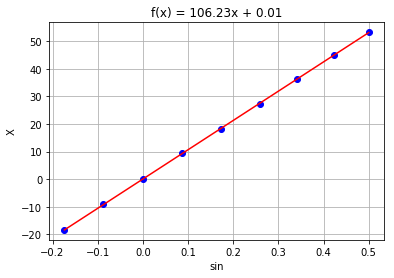

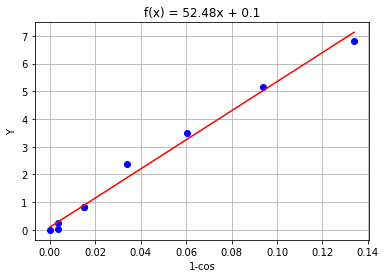

In [17]:
linX1.simplePlot(xlabel="sin", ylabel="X", title=linX1.getEquation(round_val=2))
linY1.simplePlot(xlabel="1-cos", ylabel="Y", title=linY1.getEquation(round_val=2))

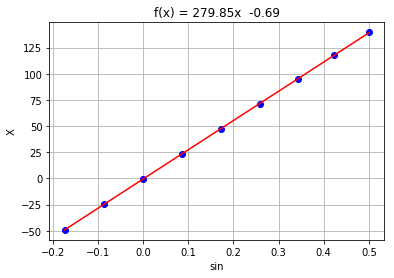

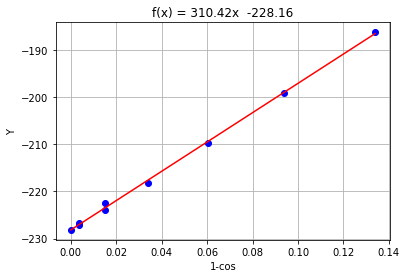

In [18]:
linX2.simplePlot(xlabel="sin", ylabel="X", title=linX2.getEquation(round_val=2))
linY2.simplePlot(xlabel="1-cos", ylabel="Y", title=linY2.getEquation(round_val=2))

Из первого набора данных мы определили вес компонентов тензовесов, 
а из второго мы определили суммарный вес компонентов и вес сферы.

In [19]:
Gmx = Ax2 - Ax1
Gmy = Ay2 - Ay1

In [20]:
print "{} gramms calculated on X".format(round(Gmx, 2))
print "{} gramms calculated on Y".format(round(Gmy, 2))

173.62 gramms calculated on X
257.94 gramms calculated on Y


Итого получается, что вес сферы определенный с помощью X компоненты = **173 грамма** (что сходится с реальными данными),
вес определенный с помощью Y компоненты существенно отличается от реальных данных, т.к. Y компонента изменялась на достаточно малые величины, соответственно имеем достаточно большую ошибку.

In [21]:
data3 = pd.read_csv("data3p.csv")

In [22]:
data3

,Unnamed: 0,dP,x,y
0,15,40.90,0.560,1.30
1,20,77.70,0.603,1.31
2,25,128.16,0.605,1.31
3,30,189.61,0.720,1.31
4,35,261.12,0.800,1.31
5,40,345.16,0.890,1.31
6,45,441.69,1.005,1.31
7,50,561.48,1.130,1.31


In [23]:
data3['x'] = data3['x'].values - x_nul
data3['y'] = data3['y'].values - y_nul
data3.rename(columns={'x' : 'x-x0', 'y' : 'y-y0'}, inplace=True)

In [24]:
data3

,Unnamed: 0,dP,x-x0,y-y0
0,15,40.90,-0.049,0.963
1,20,77.70,-0.006,0.973
2,25,128.16,-0.004,0.973
3,30,189.61,0.111,0.973
4,35,261.12,0.191,0.973
5,40,345.16,0.281,0.973
6,45,441.69,0.396,0.973
7,50,561.48,0.521,0.973


$dP = P_0 - P_{ст} => Q = dP$ 

In [25]:
data3['Q'] = data3['dP']
display(data3)

,Unnamed: 0,dP,x-x0,y-y0,Q
0,15,40.90,-0.049,0.963,40.90
1,20,77.70,-0.006,0.973,77.70
2,25,128.16,-0.004,0.973,128.16
3,30,189.61,0.111,0.973,189.61
4,35,261.12,0.191,0.973,261.12
5,40,345.16,0.281,0.973,345.16
6,45,441.69,0.396,0.973,441.69
7,50,561.48,0.521,0.973,561.48


$\rho = \dfrac{P}{R \cdot T}$, где $ R = 287 \text{ } Дж/кг \cdot {}^\circК$


$\mu = 1.458 \dfrac{T^{\frac{3}{2}}}{T + 110.4}\cdot 10^{-6} \text{ } \frac{кг}{м \cdot сек} $

In [26]:
rho = 1.19998692
mu = 1.458*293**1.5/(293+110.4)*10**(-6)
g = 9.815
d = 0.05

In [27]:
print "rho = {} \nmu = {} \ng = {} \nd = {} - sphere diameter".format(rho, mu, g, d)

rho = 1.19998692 
mu = 1.81268800379e-05 
g = 9.815 
d = 0.05 - sphere diameter


In [28]:
data3['V']= data3.apply(lambda row: sqrt(2 * row['dP'] / rho), axis=1)

In [29]:
data3['X'] = data3.apply(getX, axis=1)
data3['Y'] = data3.apply(lambda row: getY(row)+Gmy, axis=1)
display(data3)

,Unnamed: 0,dP,x-x0,y-y0,Q,V,X,Y
0,15,40.90,-0.049,0.963,40.90,8.256356,2.228263,30.272021
1,20,77.70,-0.006,0.973,77.70,11.379869,6.418377,27.960796
2,25,128.16,-0.004,0.973,128.16,14.615140,6.609601,27.962805
3,30,189.61,0.111,0.973,189.61,17.776954,17.615220,28.117341
4,35,261.12,0.191,0.973,261.12,20.861561,25.283116,28.270110
5,40,345.16,0.281,0.973,345.16,23.984848,33.921086,28.486370
6,45,441.69,0.396,0.973,441.69,27.132232,44.976346,28.831106
7,50,561.48,0.521,0.973,561.48,30.591015,57.015652,29.292868


In [30]:
data3['Re'] = data3.apply(lambda row: rho * row['V'] * d / mu, axis=1)
display(data3)

,Unnamed: 0,dP,x-x0,y-y0,Q,V,X,Y,Re
0,15,40.90,-0.049,0.963,40.90,8.256356,2.228263,30.272021,27328.251867
1,20,77.70,-0.006,0.973,77.70,11.379869,6.418377,27.960796,37666.971810
2,25,128.16,-0.004,0.973,128.16,14.615140,6.609601,27.962805,48375.609180
3,30,189.61,0.111,0.973,189.61,17.776954,17.615220,28.117341,58841.104571
4,35,261.12,0.191,0.973,261.12,20.861561,25.283116,28.270110,69051.046703
5,40,345.16,0.281,0.973,345.16,23.984848,33.921086,28.486370,79389.017600
6,45,441.69,0.396,0.973,441.69,27.132232,44.976346,28.831106,89806.750201
7,50,561.48,0.521,0.973,561.48,30.591015,57.015652,29.292868,101255.201734


In [31]:
data3['Cxa'] = data3.apply(lambda row: row['X']/(row['Q'] * np.pi * (d/2)**2) * g/ 1000, axis=1)

In [32]:
data3['Cya'] = data3.apply(lambda row: row['Y']/(row['Q'] * np.pi * (d)**2)  * g/ 1000 , axis=1)

display(data3)


,Unnamed: 0,dP,x-x0,y-y0,Q,V,X,Y,Re,Cxa,Cya
0,15,40.90,-0.049,0.963,40.90,8.256356,2.228263,30.272021,27328.251867,0.272335,0.924951
1,20,77.70,-0.006,0.973,77.70,11.379869,6.418377,27.960796,37666.971810,0.412919,0.449706
2,25,128.16,-0.004,0.973,128.16,14.615140,6.609601,27.962805,48375.609180,0.257800,0.272665
3,30,189.61,0.111,0.973,189.61,17.776954,17.615220,28.117341,58841.104571,0.464395,0.185316
4,35,261.12,0.191,0.973,261.12,20.861561,25.283116,28.270110,69051.046703,0.484006,0.135297
5,40,345.16,0.281,0.973,345.16,23.984848,33.921086,28.486370,79389.017600,0.491258,0.103138
6,45,441.69,0.396,0.973,441.69,27.132232,44.976346,28.831106,89806.750201,0.509011,0.081573
7,50,561.48,0.521,0.973,561.48,30.591015,57.015652,29.292868,101255.201734,0.507598,0.065197


In [33]:
testdata = pd.read_csv("datatest.csv")
display(testdata.head(10))

,Re,Cx
0,1010.0,0.492
1,1260.0,0.457
2,1680.0,0.441
3,2500.0,0.426
4,3350.0,0.426
5,4480.0,0.426
6,5770.0,0.426
7,7180.0,0.427
8,9250.0,0.427
9,11500.0,0.427


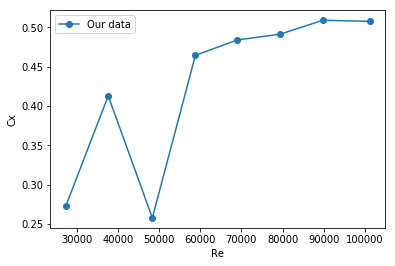

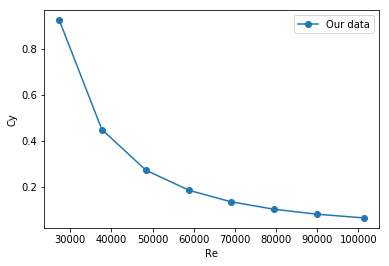

In [34]:
plt.figure(1)
plt.plot(data3['Re'].values, data3['Cxa'].values, marker='o', linestyle="-", label="Our data")
plt.legend()
plt.xlabel('Re')
plt.ylabel('Cx')
plt.figure(2)
plt.plot(data3['Re'].values, data3['Cya'].values, marker='o', linestyle="-", label="Our data")
plt.xlabel('Re')
plt.ylabel('Cy')
plt.legend()
plt.show()

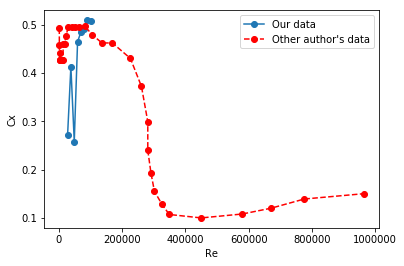

In [35]:
plt.figure(1)
plt.plot(data3['Re'].values, data3['Cxa'].values, marker='o', linestyle="-", label="Our data")
plt.plot(testdata['Re'].values, testdata['Cx'], marker='o', linestyle="--", color="r", label='Other author\'s data')
plt.legend()
plt.xlabel('Re')
plt.ylabel('Cx')
plt.show()

Для подсчета погрешности коэффициентов воспользуемся общей формулой:
$x = f(A, B, C, \dots)$

$\sigma_x = \sqrt{\left(\dfrac{\partial f}{\partial A}\right)^2 \sigma_A^2 + \left(\dfrac{\partial f}{\partial B}\right)^2 \sigma_B^2 + \left(\dfrac{\partial f}{\partial C}\right)^2 \sigma_C^2 + \cdots}$

Так как мы знаем, что:

$C_{xa} = \dfrac{X_a}{Q \cdot S} \qquad C_{ya} = \dfrac{Y_a}{Q \cdot S}$

то применимо к нашей формуле:

$\sigma_{C_{xa}} = \sqrt{\left(\dfrac{\partial C_{xa}}{\partial X_a}\right)^2 \sigma_{X_a}^2 + \left(\dfrac{\partial C_{xa}}{\partial Q}\right)^2 \sigma_Q^2}$

$\sigma_{C_{ya}} = \sqrt{\left(\dfrac{\partial C_{ya}}{\partial Y_a}\right)^2 \sigma_{Y_a}^2 + \left(\dfrac{\partial C_{ya}}{\partial Q}\right)^2 \sigma_Q^2}$

где частные производные вычислены в наших точках, и $Q = \Delta P$

$\dfrac{\partial C_{xa}}{\partial X_a} = \dfrac{1}{Q \cdot S} \qquad \dfrac{\partial C_{xa}}{\partial Q} = -\dfrac{X_a}{Q^2 \cdot S}$

$\dfrac{\partial C_{ya}}{\partial Y_a} = \dfrac{1}{Q \cdot S} \qquad \dfrac{\partial C_{ya}}{\partial Q} = -\dfrac{Y_a}{Q^2 \cdot S}$

Также знаем погрешности тензовесов и манометра:

$\sigma_p = (2 + 0.0.1\Delta P) \qquad \sigma_{X} = 0.40 \times X \qquad \sigma_{Y} = 0.40 \times Y$

In [36]:
S = np.pi * (d/2) **2

def sigmaX(x):
    sigmaOtn = 0.4 * g /1000
    return sigmaOtn

def sigmaY(x):
    sigmaOtn = 0.4 * g / 1000
    return sigmaOtn

def sigmadP(dp):
    return 2 + 0.01 * dp

def dCxX(x, dp) :
    return 1/(S * dp)

def dCyY(y, dp) :
    return 1/(S * dp)

def dCxdP(x, dp) :
    return -x*g/1000 /(S * dp**2)

def dCydP(y, dp) :
    return -y * g / 1000 /(S * dp**2)

def sigmaCx(x, dp):
    interm = (dCxX(x, dp) * sigmaX(x))**2 + (dCxdP(x, dp) * sigmadP(dp))**2
    return sqrt(interm)

def sigmaCy(y, dp):
    interm = (dCyY(y, dp) * sigmaY(y))**2 + (dCydP(y, dp) * sigmadP(dp))**2
    return sqrt(interm)
    

In [37]:
data3['sigmaCx'] = data3.apply(lambda row: sigmaCx(row['X'], row['Q']) , axis=1)
data3['sigmaCy'] = data3.apply(lambda row: sigmaCy(row['Y'], row['Q']), axis=1)
display(data3)

,Unnamed: 0,dP,x-x0,y-y0,Q,V,X,Y,Re,Cxa,Cya,sigmaCx,sigmaCy
0,15,40.90,-0.049,0.963,40.90,8.256356,2.228263,30.272021,27328.251867,0.272335,0.924951,0.051452,0.223334
1,20,77.70,-0.006,0.973,77.70,11.379869,6.418377,27.960796,37666.971810,0.412919,0.449706,0.029665,0.069249
2,25,128.16,-0.004,0.973,128.16,14.615140,6.609601,27.962805,48375.609180,0.257800,0.272665,0.016941,0.031989
3,30,189.61,0.111,0.973,189.61,17.776954,17.615220,28.117341,58841.104571,0.464395,0.185316,0.014222,0.018526
4,35,261.12,0.191,0.973,261.12,20.861561,25.283116,28.270110,69051.046703,0.484006,0.135297,0.011476,0.012246
5,40,345.16,0.281,0.973,345.16,23.984848,33.921086,28.486370,79389.017600,0.491258,0.103138,0.009683,0.008719
6,45,441.69,0.396,0.973,441.69,27.132232,44.976346,28.831106,89806.750201,0.509011,0.081573,0.008671,0.006555
7,50,561.48,0.521,0.973,561.48,30.591015,57.015652,29.292868,101255.201734,0.507598,0.065197,0.007751,0.005019


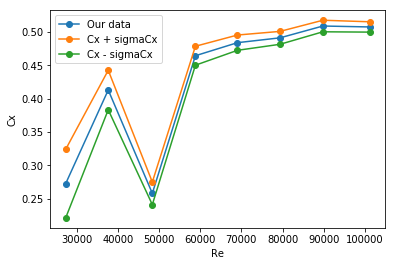

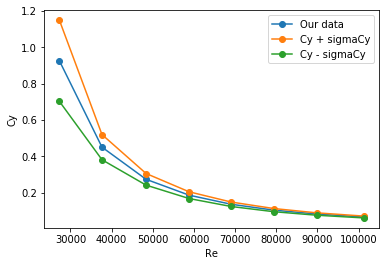

In [38]:
plt.figure(1)
plt.plot(data3['Re'].values, data3['Cxa'].values, marker='o', linestyle="-", label="Our data")
plt.plot(data3['Re'].values, data3['Cxa'].values + data3['sigmaCx'].values, marker='o', linestyle="-", label="Cx + sigmaCx")
plt.plot(data3['Re'].values, data3['Cxa'].values - data3['sigmaCx'].values, marker='o', linestyle="-", label="Cx - sigmaCx")
plt.legend()
plt.xlabel('Re')
plt.ylabel('Cx')
plt.figure(2)
plt.plot(data3['Re'].values, data3['Cya'].values, marker='o', linestyle="-", label="Our data")
plt.plot(data3['Re'].values, data3['Cya'].values + data3['sigmaCy'].values, marker='o', linestyle="-", label="Cy + sigmaCy")
plt.plot(data3['Re'].values, data3['Cya'].values - data3['sigmaCy'].values, marker='o', linestyle="-", label="Cy - sigmaCy")
plt.xlabel('Re')
plt.ylabel('Cy')
plt.legend()
plt.show()